In [ ]:
# Step 1: Clone the YOLOv5 repository and install dependencies
!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install required packages

# Step 2: Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Unzip the Dataset
# Replace the path below with the location of your dataset zip file


# Path to the data.yaml file

Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.67 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (11704/11704), done.
/content/yolov5/yolov5
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q /content/drive/MyDrive/Fracture\ Detection.v2i.yolov5pytorch.zip -d /content/Fracture_Detection_Dataset

# Step 4: Verify the Dataset Structure and YAML file
# Check that the 'data.yaml' file and 'train', 'valid', 'test' folders are set up correctly.
import yaml

unzip:  cannot find or open /content/drive/MyDrive/Fracture Detection.v2i.yolov5pytorch.zip, /content/drive/MyDrive/Fracture Detection.v2i.yolov5pytorch.zip.zip or /content/drive/MyDrive/Fracture Detection.v2i.yolov5pytorch.zip.ZIP.


In [ ]:
yaml_path = '/content/Fracture_Detection_Dataset/data.yaml'

# Print the data.yaml content to verify
with open(yaml_path, 'r') as file:
    data_config = yaml.safe_load(file)
    print(data_config)


{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 1, 'names': ['Bone Fracture Detected'], 'roboflow': {'workspace': 'fracture-detection-mhpoa', 'project': 'fracture-detection-f3pux', 'version': 2, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/fracture-detection-mhpoa/fracture-detection-f3pux/dataset/2'}}


In [ ]:
!python train.py --data /content/Fracture_Detection_Dataset/data.yaml --cfg yolov5s.yaml --weights yolov5s.pt --name Fracture_Model --epochs 50 --save-period 1


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      44/49      4.36G    0.03882    0.01441          0         39        640:   3% 12/411 [00:03<02:19,  2.87it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      44/49      4.36G    0.03936    0.01438          0         29        640:   3% 13/411 [00:04<02:07,  3.13it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      44/49      4.36G    0.03981    0.01412          0         26        640:   3% 14/411 [00:04<02:13,  2.98it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

In [ ]:
from google.colab import files

trained_model_path = '/content/best.pt'
files.download(trained_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!mkdir /content/Fracture_Test_Results

# Run YOLOv5 inference on test images
!python detect.py --weights /content/best.pt --img 640 --conf 0.25 \
--source /content/Fracture_Detection_Dataset/test/images --project /content/Fracture_Test_Results --name "inference_results" --save-txt --save-conf


mkdir: cannot create directory ‘/content/Fracture_Test_Results’: File exists
detect: weights=['/content/best.pt'], source=/content/Fracture_Detection_Dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/Fracture_Test_Results, name=inference_results, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/936 /content/Fracture_Detection_Dataset/test/images/0-_big_gallery_jpg.rf.d89549a36170fef673e0c30242f0a35b.jpg: 640x640 1 Bone Fracture Detected, 11.4ms
image 2/936 /content/Fracture

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob

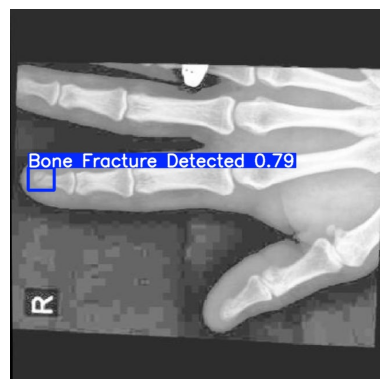

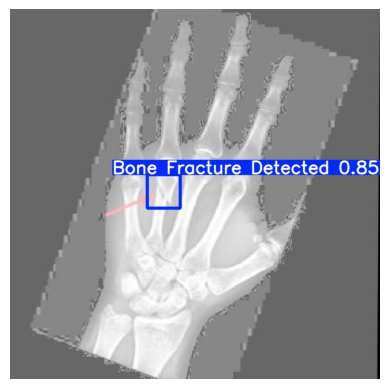

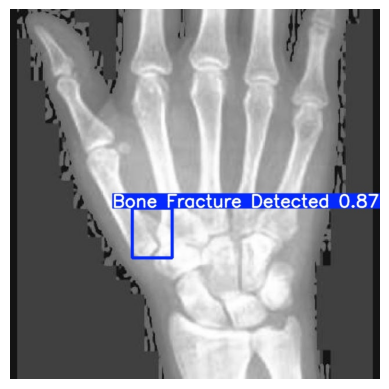

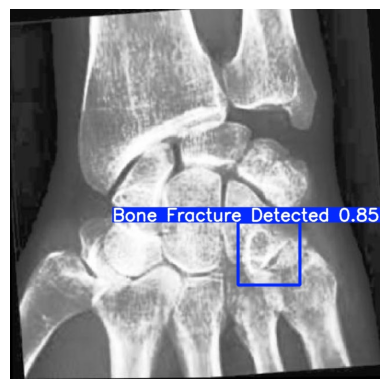

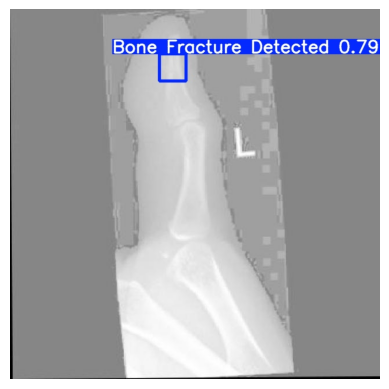

In [ ]:
# Display a few example results
result_images = glob.glob('/content/Fracture_Test_Results/inference_results/*.jpg')

for img_path in result_images[:5]:  # Show the first 5 results
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [ ]:
from google.colab import files

# Path to the best model weights
trained_model_path = '/content/yolov5/runs/train/Fracture_Model/weights/best.pt'

files.download(trained_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install ultralytics opencv-python pillow


In [ ]:
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk
import torch
import cv2
import os
import shutil

In [ ]:
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/Fracture_Model/weights/best.pt')  # Ensure this points to your model


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-9 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import ImageTk, Image
import torch
import cv2
import numpy as np

# Load the trained model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')  # Update with the correct path to your best.pt file

def detect_fracture(image_path):
    img = Image.open(image_path)
    img = img.convert('RGB')
    img = np.array(img)

    results = model(img)
    detections = results.xyxy[0]

    if len(detections) == 0:
        return "non-fractured", img
    else:
        for x1, y1, x2, y2, conf, cls in detections:
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        return "fractured", img

def upload_and_detect():
    file_path = filedialog.askopenfilename()
    if file_path:
        label, processed_img = detect_fracture(file_path)
        messagebox.showinfo("Detection Result", f"Image is {label}")
        display_image(processed_img)

def display_image(img_array):
    img = Image.fromarray(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    img_tk = ImageTk.PhotoImage(image=img)
    panel.img_tk = img_tk
    panel.config(image=img_tk)
    panel.pack()

root = tk.Tk()
root.title("Bone Fracture Detection")

upload_btn = tk.Button(root, text="Upload Image", command=upload_and_detect)
upload_btn.pack()

panel = tk.Label(root)
panel.pack()

root.mainloop()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-9 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


TclError: no display name and no $DISPLAY environment variable

In [ ]:
# Install necessary libraries
!pip install gradio torch torchvision opencv-python
!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repo
%cd yolov5
!pip install -r requirements.txt  # Install YOLOv5 requirements


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7
Clonin

In [ ]:
# Clone the YOLOv5 repository and navigate to it
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt  # Install YOLOv5 requirements

# Move back to the content directory
%cd /content


Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 16.10 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.
/content/yolov5/yolov5
/content


In [ ]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# Move back to content directory
%cd /content


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
/content


In [ ]:
import torch
import gradio as gr
from PIL import Image
import numpy as np

# Load YOLOv5 model with custom weights
model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')

# Set a lower confidence threshold (optional, depends on model accuracy)
model.conf = 0.25  # Adjust confidence threshold to capture more detections

# Define the function to detect fractures and render labels
def detect_fracture(image):
    # Convert PIL image to numpy array for YOLOv5
    img = np.array(image)

    # Run the YOLOv5 model on the input image
    results = model(img)

    # Check if any detections were made
    if results.pred[0].shape[0] > 0:  # if there are any predictions
        # Use render method to draw bounding boxes and labels on the image
        results.render()

        # Extract the rendered image with labels (bounding boxes, etc.)
        annotated_img = results.ims[0] if hasattr(results, 'ims') else results.imgs[0]

        # Convert the numpy array with annotations back to PIL format for Gradio
        detected_img = Image.fromarray(annotated_img)
    else:
        # No detections, return the original image without annotations
        detected_img = image

    return detected_img

# Gradio Interface setup with updated components
interface = gr.Interface(
    fn=detect_fracture,
    inputs=gr.Image(type="pil"),
    outputs=gr.Image(type="pil", label="Fracture Detection"),
    title="Bone Fracture Detection",
    description="Upload an X-ray image, and the model will detect and label bone fractures if found."
)

# Launch the Gradio interface
interface.launch(debug=True)


YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://52b63e4875720ef793.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: Fu

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://52b63e4875720ef793.gradio.live


In [ ]:
import torch
import gradio as gr
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Load YOLOv5 model with custom weights
model = torch.hub.load('/content/yolov5', 'custom', path='/content/best.pt', source='local')

# Set a lower confidence threshold (optional, depends on model accuracy)
model.conf = 0.5  # Adjust confidence threshold to capture more detections

# Define the function to detect fractures and render labels
def detect_fracture(image):
    # Convert PIL image to numpy array for YOLOv5
    img = np.array(image)

    # Run the YOLOv5 model on the input image
    results = model(img)

    # Check if any detections were made
    if results.pred[0].shape[0] > 0:  # if there are any predictions (fractures detected)
        # Use render method to draw bounding boxes and labels on the image
        results.render()

        # Extract the rendered image with labels (bounding boxes, etc.)
        annotated_img = results.ims[0] if hasattr(results, 'ims') else results.imgs[0]

        # Convert the numpy array with annotations back to PIL format for Gradio
        detected_img = Image.fromarray(annotated_img)
    else:
        # No detections, create an output image that says "Fracture Not Detected"
        detected_img = image.copy()
        draw = ImageDraw.Draw(detected_img)

        # Add text to the image
        text = "Fracture Not Detected"
        try:
            font = ImageFont.truetype("arial.ttf", 40)
        except IOError:
            font = ImageFont.load_default()

        # Calculate text size and position
        textbbox = draw.textbbox((0, 0), text, font=font)
        textwidth, textheight = textbbox[2] - textbbox[0], textbbox[3] - textbbox[1]
        x = (detected_img.width - textwidth) // 2
        y = (detected_img.height - textheight) // 2

        # Draw text on the image
        draw.text((x, y), text, fill="red", font=font)

    return detected_img

# Create Gradio interface
interface = gr.Interface(
    fn=detect_fracture,
    inputs=gr.Image(type="pil"),
    outputs=gr.Image(type="pil", label="Fracture Detection"),
    title="Bone Fracture Detection",
    description="Upload an X-ray image. The model will detect fractures if present, or display 'Fracture Not Detected' if no fractures are found.",
)

# Launch the Gradio interface
interface.launch()


YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a71d4f25b4ec92e803.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install scikit-learn


In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Paths to the predicted labels and true labels (these paths should point to where the labels are stored)
predicted_labels_path = "/content/Fracture_Test_Results/inference_results/labels/"
true_labels_path = "/content/Fracture_Detection_Dataset/test/labels/"

# Function to read labels from a .txt file
def read_labels_from_file(file_path):
    with open(file_path, 'r') as file:
        labels = file.readlines()
    return [int(label.split()[0]) for label in labels]  # Extracting the class label (the first value in each line)

# Function to get all true and predicted labels
def get_labels(true_labels_path, predicted_labels_path):
    true_labels = []
    predicted_labels = []

    # Iterate through all label files
    for filename in os.listdir(true_labels_path):
        if filename.endswith('.txt'):
            # Get true labels
            true_label_path = os.path.join(true_labels_path, filename)
            true_labels.extend(read_labels_from_file(true_label_path))

            # Get predicted labels (make sure the file names match)
            predicted_label_path = os.path.join(predicted_labels_path, filename)
            if os.path.exists(predicted_label_path):
                predicted_labels.extend(read_labels_from_file(predicted_label_path))

    return true_labels, predicted_labels

# Get true and predicted labels
true_labels, predicted_labels = get_labels(true_labels_path, predicted_labels_path)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(cm, cmap='Blues', alpha=0.7)
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

# Print classification report (precision, recall, F1 score)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Calculate Accuracy
accuracy = np.sum(np.array(true_labels) == np.array(predicted_labels)) / len(true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")


ValueError: Found input variables with inconsistent numbers of samples: [1133, 1205]